## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

Regression predicts continuous values, while classification predicts discrete categories.


2. What is a confusion table/matrix? What does it help us understand about a model's performance? 

A confusion table/matrix is a table that compares the true label to the predicted label. It helps us understand what types of errors the models makes and whether the results are biased or not. 


3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is the proportion of correct predictions to total predictions. It might not be entirely sufficient when the dataset is imbalanced or biased. 


4. What does the root mean squared error quantify about a particular model?

It measures the average magnitude of prediction errors in regression, ultimately telling us how far the predictions deviate from the true values. 


5. What are overfitting and underfitting? 

Overfitting is when the model is too complex and learns the data too easily, often including noise and outliers. There is very low error initially, but new testing data does not perform well. 

Underfitting is when the model is too simle and does not present any patterns or structure in the data. These models often have very high error. 


6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

It improves the model performance because it ensures that the model isn't overfitting and can be applied to new data while still prediciting patterns. 


7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Class Label Strengths and Weaknesses: 

Class labels provides a definitive answer and very intuitive. It simplfies the possible answers, making it easy to store the answers as a single integer or string label. However, it does not account for the confidence score and you can not adjust the model to be more flexible. Also, class labels often have masked errors and does not show when the model is confused. 

Probability Distribution Strengths and Weaknesses:

This approach tells you how confident the model and you are able to adjust thresholds, making it really flexible. Alos, it allows you to rank items and allows you to tune the model much easier. However, the models can be overconfident and requires calibration. Also it may be difficult to interpret the data. 

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64


<Axes: xlabel='mine_type', ylabel='count'>

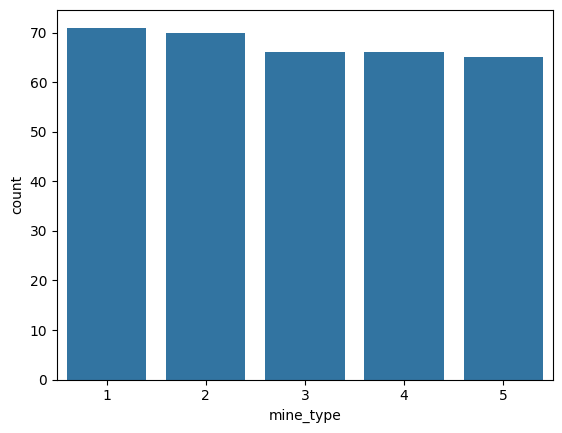

In [8]:
# 1
import pandas as pd
import seaborn as sns
df = pd.read_csv("land_mines.csv")

df.describe()
print(df['mine_type'].value_counts())

# EDA
sns.countplot(x='mine_type', data=df)

In [9]:
# 2
from sklearn.model_selection import train_test_split
X = df[['voltage', 'height', 'soil']]
Y = df['mine_type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# 3 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracies = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, Y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, preds)
    accuracies.append(acc)

best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 3
Best Accuracy: 0.5441176470588235


I evaluted k from 1-20 and selected the value that maximized test accuracy, which was k=3.

In [16]:
# 4

from sklearn.metrics import confusion_matrix, classification_report

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_scaled, Y_train)
preds = best_model.predict(X_test_scaled)

confusion_matrix(Y_test, preds)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           1       0.47      0.64      0.54        11
           2       0.69      0.92      0.79        12
           3       0.64      0.56      0.60        16
           4       0.40      0.55      0.46        11
           5       0.50      0.22      0.31        18

    accuracy                           0.54        68
   macro avg       0.54      0.58      0.54        68
weighted avg       0.55      0.54      0.52        68



It is has an overall accuracy rate of 54%, which is not great but performs better than randomly guessing. The performance is strong in class 2 because it correctly identifies 92% of true class 2 mines. The model performs the worse for Class 5 because it identifies true class 5 mines only 22% of the time. The model performs decently for Class 1 because it predicts true Class 1 mines 64% of the time. 

**Answer to #5**

Since the model is not entirely reliable, I would adivse someone to use this model to only support expert assessment. By no means should this model be used on its own. The predictions with low confidence should require additional inspection. 

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
# 1
df = pd.read_csv("USA_cars_datasets.csv")

df = df[['price', 'year', 'mileage']]
print(df.isna().sum())
# There are no NA's to handle

print(df.head())
print(df.shape)

price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [ ]:
# 2
for col in ['year', 'mileage']:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [25]:
# 3
from sklearn.model_selection import train_test_split
X = df[['year', 'mileage']]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

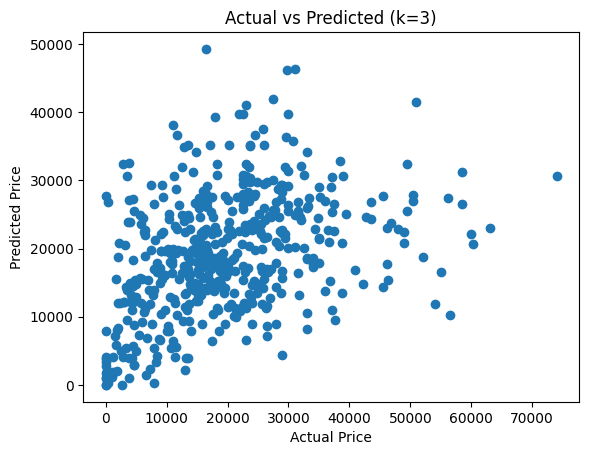

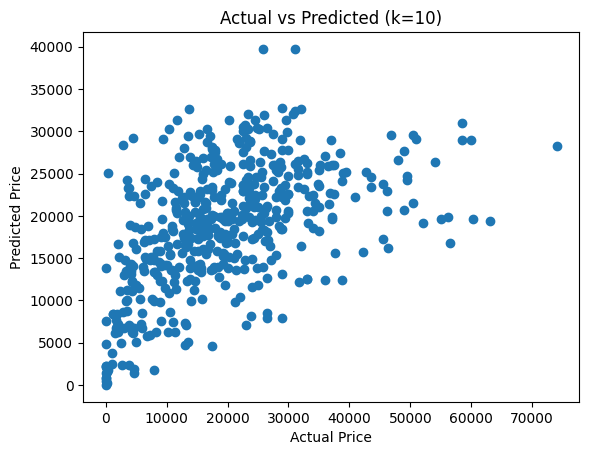

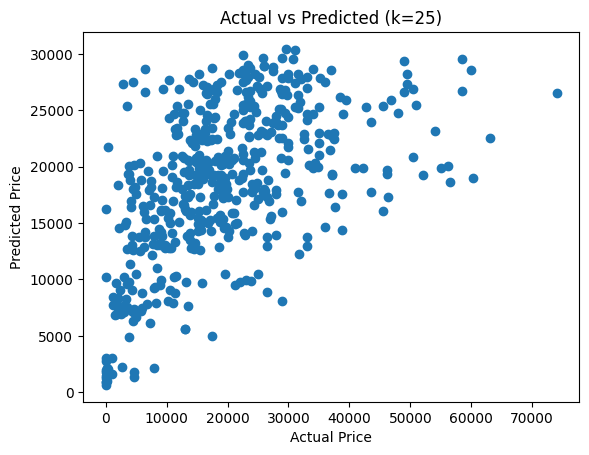

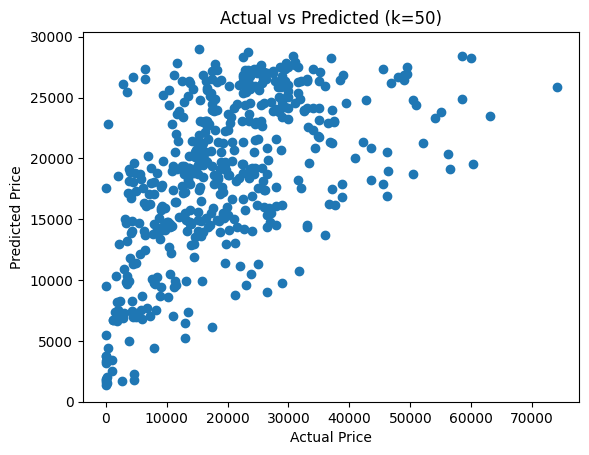

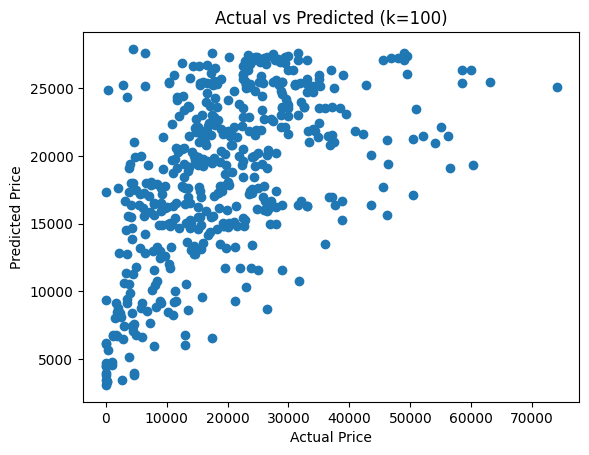

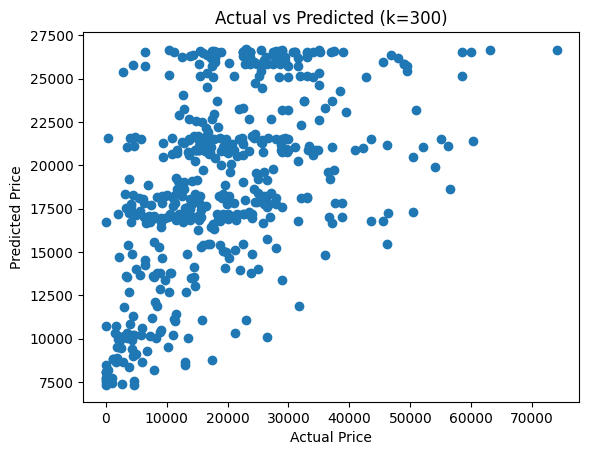

[(3, 148065935.51955554), (10, 117399126.10604002), (25, 112576160.82390079), (50, 110202549.3014296), (100, 112253932.8184272), (300, 114496301.82933456)]


In [28]:
# 4
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, preds)
    mse_values.append(mse)

    plt.figure()
    plt.scatter(Y_test, preds)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted (k={k})")
    plt.show()

print(list(zip(k_values, mse_values)))

As k increases initially, the predictions become smoother and there is better generalization. However, as k increases past the 100 point, the model is now underfitting and the graph is very scattered. 

In [29]:
# 5
best_k = k_values[mse_values.index(min(mse_values))]
print("Best k:", best_k)

Best k: 50


**Answer to # 6**

When k was very small, the model overfit the training data. As k increased, the predictions become smoother and the model improves generalizing. However, when the k was very large, like 300, the model started underfitting. The predictions began to lean more towards the mean, decreasing the variance, but increasing bias. 

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [44]:
# 1

df = pd.read_csv("airbnb_hw.csv")
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

df.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


In [45]:
# 2 

missing_df = df.loc[df["Review Scores Rating"].isnull()].copy()
complete_df = df.loc[~df["Review Scores Rating"].isnull()].copy()

In [46]:
# 3

complete_df = complete_df.dropna(axis=0, how='any')
complete_df.head()

,Review Scores Rating,Price,Beds
4,96.0,549,3.0
5,100.0,149,1.0
6,100.0,250,1.0
7,94.0,90,1.0
8,90.0,270,2.0


In [51]:
# Cleaning data 
complete_df["Price"] = (
    complete_df["Price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)

complete_df["Price"] = pd.to_numeric(complete_df["Price"], errors="coerce")

complete_df["Beds"] = pd.to_numeric(complete_df["Beds"], errors="coerce")

complete_df["Review Scores Rating"] = pd.to_numeric(complete_df["Review Scores Rating"], errors="coerce")

complete_df.isnull().sum()

Review Scores Rating    0
Price                   0
Beds                    0
dtype: int64

In [ ]:
# 4

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting data
X = complete_df[["Price", "Beds"]]
y = complete_df["Review Scores Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying KNN regression for different k values and calculating best k based on SSE
k_values = range(1, 31)
sse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    sse = np.sum((y_test - preds)**2)
    sse_values.append(sse)

best_k = k_values[sse_values.index(min(sse_values))]
print("Best k:", best_k)

Best k: 29


In [75]:
# 5
# 1. Clean the missing_df columns just like you did for complete_df
missing_df["Price"] = (
    missing_df["Price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)
missing_df["Price"] = pd.to_numeric(missing_df["Price"], errors="coerce")
missing_df["Beds"] = pd.to_numeric(missing_df["Beds"], errors="coerce")

# Drop any rows in missing_df that have NaN in Price or Beds (can't predict without them)
missing_df = missing_df.dropna(subset=['Price', 'Beds'])

# 2. Scale the features
X_missing = missing_df[['Price', 'Beds']]
X_missing_scaled = scaler.transform(X_missing)

# 3. Initialize and fit the final model using your best_k (29)
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)

# 4. Predict and assign back to the dataframe
missing_df['Review Scores Rating'] = final_model.predict(X_missing_scaled)

print(f"Successfully predicted {len(missing_df)} ratings.")
print(missing_df.head())

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)